In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from time import sleep
from random import randint

In [2]:
url = "https://www.goodreads.com/list/show/7" 
r = requests.get(url)

soup = BeautifulSoup(r.text,'html.parser')

table = soup.find_all('table', class_="tableList js-dataTooltip")





In [3]:
all_tr = table[0].find_all('tr')
output = {'Name': [], 'Author': [], 'Year published':[], 'Genre':[], 'Related':[], 'Description':[]}
urls = []
for row in all_tr:
    a_tag = row.find('a', class_='bookTitle')
    author_name = row.find('a', class_='authorName').text
    author_name = author_name.strip('\n')
    book_name = row.find('a', class_='bookTitle').text
    book_name = book_name.strip('\n')
    url = "https://www.goodreads.com" + a_tag.get('href')
    output['Name'].append(book_name)
    output['Author'].append(author_name)
    urls.append(url)
    


In [19]:
for url in urls:
    r = requests.get(url)
    soup = BeautifulSoup(r.text,'html.parser') 
    box = soup.find('div', class_="rightContainer")
    all_div = box.find_all('a', class_="actionLinkLite bookPageGenreLink" )
    sleep(randint(2,10))
    genres = []
    for container in all_div:
        genre = container.text
        genres.append(genre)
    if len(genres) > 1:
        output['Genre'].append(genres[0] + ", " + genres[1])
    else:
        output['Genre'].append(genres[0])
        
    desc_container = soup.find(id ="description")
    desc = desc_container.find_all('span')
    if len(desc) > 0:
        output['Description'].append(desc[1].text)
    else:
        output['Description'].append(desc[0].text)
        
    box = soup.find(id="details")
    a = box.find_all('div', class_='row')
    year = re.findall('\d{4}',a[1].text)
    if len(year) > 0:
        output['Year published'].append(year[-1])
    else:
        output['Year published'].append(year[0])
        


        
    

In [21]:
print(output)

{'Name': ['Harry Potter and the Deathly Hallows (Harry Potter, #7)', 'The Hunger Games (The Hunger Games, #1)', 'The Kite Runner', 'The Book Thief', 'Harry Potter and the Half-Blood Prince (Harry Potter, #6)', 'Harry Potter and the Order of the Phoenix (Harry Potter, #5)', 'The Help', 'A Thousand Splendid Suns', 'Life of Pi', 'Catching Fire (The Hunger Games, #2)', 'The Girl with the Dragon Tattoo (Millennium, #1)', "The Time Traveler's Wife", 'The Fault in Our Stars', 'The Da Vinci Code (Robert Langdon, #2)', 'The Road', 'Water for Elephants', 'The Curious Incident of the Dog in the Night-Time', 'Mockingjay (The Hunger Games, #3)', 'Middlesex', 'The Lovely Bones', 'Divergent (Divergent, #1)', 'Twilight (Twilight, #1)', 'Atonement', 'The Lightning Thief (Percy Jackson and the Olympians, #1)', 'The Shadow of the Wind (The Cemetery of Forgotten Books, #1)', 'City of Bones (The Mortal Instruments, #1)', 'American Gods (American Gods, #1)', 'The Secret Life of Bees', 'Extremely Loud & Incr

In [11]:
results_df.head()

,Name,Author,Year published,Genre,Related,Description
0,To Kill a Mockingbird,Harper Lee,1960,"Classics, Fiction",,The unforgettable novel of a childhood in a sl...
1,1984,George Orwell,1949,"Classics, Fiction",,"Among the seminal texts of the 20th century, N..."
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,1997,"Fantasy, Young Adult",,Alternate cover edition of ISBN 9780439554930H...
3,The Great Gatsby,F. Scott Fitzgerald,1925,"Classics, Fiction",,Alternate Cover Edition ISBN: 0743273567 (ISBN...
4,Animal Farm,George Orwell,1945,"Classics, Fiction",,Librarian's note: There is an Alternate Cover ...


In [12]:
results_df.tail()

,Name,Author,Year published,Genre,Related,Description
95,A Portrait of the Artist as a Young Man,James Joyce,1916,"Classics, Fiction",,The portrayal of Stephen Dedalus's Dublin chil...
96,To the Lighthouse,Virginia Woolf,1927,"Classics, Fiction",,"The serene and maternal Mrs. Ramsay, the tragi..."
97,Blindness,José Saramago,1995,"Fiction, Science Fiction",,"From Nobel Prize–winning author José Saramago,..."
98,Cat's Cradle,Kurt Vonnegut Jr.,1963,"Fiction, Classics",,"Told with deadpan humour and bitter irony, Kur..."
99,"Winnie-the-Pooh (Winnie-the-Pooh, #1)",A.A. Milne,1926,"Classics, Childrens",,The adventures of Christopher Robin and his fr...


In [22]:
url ='https://www.goodreads.com/book/show/136251.Harry_Potter_and_the_Deathly_Hallows' 
r = requests.get(url)
soup = BeautifulSoup(r.text,'html.parser') 
box = soup.find(id="details")
a = box.find_all('div', class_='row')
year = re.findall('\d{4}',a[1].text)


In [23]:
if len(year) > 0:
    print(year[-1])
else:
    print(year[0])
        

2007


In [4]:
import nltk


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [58]:
contents = output['Description'][:]
related = []
tokens = []
stopwords = ['novel', 'story', 'readers', 'edition', 'book', 'cover']
for content in contents:
    sentences = content.split('.') 
    nouns = [] 
    for sentence in set(sentences):
        for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
            if (pos == 'NN' or pos == 'NNS') and word not in stopwords :
                nouns.append(word)
    related.append(', '.join(nouns))
    tokens += nouns
    
    

In [59]:
output['Related'] = related

In [63]:
results_df = pd.DataFrame(output)

In [64]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            100 non-null    object
 1   Author          100 non-null    object
 2   Year published  100 non-null    object
 3   Genre           100 non-null    object
 4   Related         100 non-null    object
 5   Description     100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [65]:
results_df.head()

,Name,Author,Year published,Genre,Related,Description
0,To Kill a Mockingbird,Harper Lee,1960,"Classics, Fiction","childhood, town, crisis, conscience, bestselle...",The unforgettable novel of a childhood in a sl...
1,1984,George Orwell,1949,"Classics, Fiction","texts, century, work, haunting, purgatory, sat...","Among the seminal texts of the 20th century, N..."
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,1997,"Fantasy, Young Adult","life, year, life, everything, object, hidden, ...",Alternate cover edition of ISBN 9780439554930H...
3,The Great Gatsby,F. Scott Fitzgerald,1925,"Classics, Fiction","classics, twentieth-century, literature, gener...",Alternate Cover Edition ISBN: 0743273567 (ISBN...
4,Animal Farm,George Orwell,1945,"Classics, Fiction","farm, animals, stage, fables, fairy, tale, gro...",Librarian's note: There is an Alternate Cover ...


In [66]:
results_df.tail()

,Name,Author,Year published,Genre,Related,Description
95,A Portrait of the Artist as a Young Man,James Joyce,1916,"Classics, Fiction","insight, life, childhood, work, fiction, awake...",The portrayal of Stephen Dedalus's Dublin chil...
96,To the Lighthouse,Virginia Woolf,1927,"Classics, Fiction","children, guests, holiday, time, way, lives, f...","The serene and maternal Mrs. Ramsay, the tragi..."
97,Blindness,José Saramago,1995,"Fiction, Science Fiction","eyewitness, nightmare, boy, mother, girl, glas...","From Nobel Prize–winning author José Saramago,..."
98,Cat's Cradle,Kurt Vonnegut Jr.,1963,"Fiction, Classics","'fathers, bomb, legacy, world, gift, brings, e...","Told with deadpan humour and bitter irony, Kur..."
99,"Winnie-the-Pooh (Winnie-the-Pooh, #1)",A.A. Milne,1926,"Classics, Childrens","adventures, friends, balloon, honey, birthday",The adventures of Christopher Robin and his fr...


In [67]:
results_df.to_csv('best_goodreads.csv')

In [68]:
results_df.to_excel('goodreads.xlsx')

In [69]:
print(tokens)

['childhood', 'town', 'crisis', 'conscience', 'bestseller', 'success', 'Today', 'masterpiece', 'literature', 'roots', 'kindness', 'cruelty', 'love', 'humor', 'pathos', 'film', 'copies', 'print', 'forty', 'languages', 'woman', 'appeal', 'love', 'texts', 'century', 'work', 'haunting', 'purgatory', 'satirist', 'vision', 'world', 'stiff', 'attempt', 'individuality', 'brilliance', 'prescience', 'ubiquity', 'television', 'distortion', 'language—and', 'ability', 'version', 'hell', 'reading', 'students', 'novels', 'life', 'year', 'life', 'everything', 'object', 'hidden', 'castle', 'walls', 'responsibility', 'hands', 'community', 'characters', 'situations', 'countless', 'exciting', 'details', 'installment', 'series', 'world', 'stage', 'high-stakes', 'adventures', 'fortune', 'changes', 'letter', 'truth', 'wizard', 'lifetime', 'powers', 'kid', 'visitor', 'relatives', 'home', 'parents', 'heartless', 'relatives', 'closet', 'stairs', 'boy', 'person', 'curse', 'takeover', 'world', 'contact', 'forces'

In [61]:
freq = nltk.FreqDist(tokens)

for key,val in freq.items():
    print(str(key) + ':' + str(val))


childhood:12
town:5
crisis:1
conscience:1
bestseller:2
success:3
Today:2
masterpiece:11
literature:15
roots:2
kindness:2
cruelty:4
love:21
humor:7
pathos:1
film:2
copies:3
print:1
forty:2
languages:3
woman:18
appeal:1
texts:1
century:10
work:14
haunting:1
purgatory:1
satirist:1
vision:10
world:43
stiff:1
attempt:2
individuality:1
brilliance:1
prescience:1
ubiquity:1
television:6
distortion:1
language—and:1
ability:1
version:4
hell:2
reading:1
students:3
novels:11
life:36
year:4
everything:3
object:2
hidden:1
castle:1
walls:1
responsibility:1
hands:4
community:2
characters:12
situations:1
countless:2
exciting:1
details:2
installment:2
series:10
stage:3
high-stakes:2
adventures:7
fortune:1
changes:2
letter:2
truth:4
wizard:5
lifetime:3
powers:2
kid:1
visitor:2
relatives:3
home:14
parents:4
heartless:1
closet:1
stairs:1
boy:16
person:2
curse:2
takeover:2
contact:1
forces:3
terrifying:3
classics:4
twentieth-century:2
generations:6
achievement:5
career:3
parties:1
time:17
gin:1
drink:1
sex:

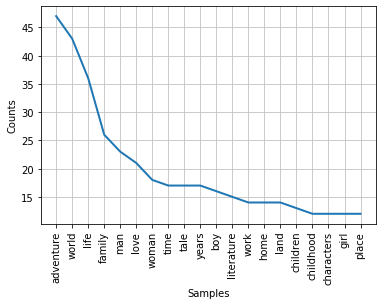

In [62]:
freq.plot(20, cumulative=False)